# Healthcare Diabetes 

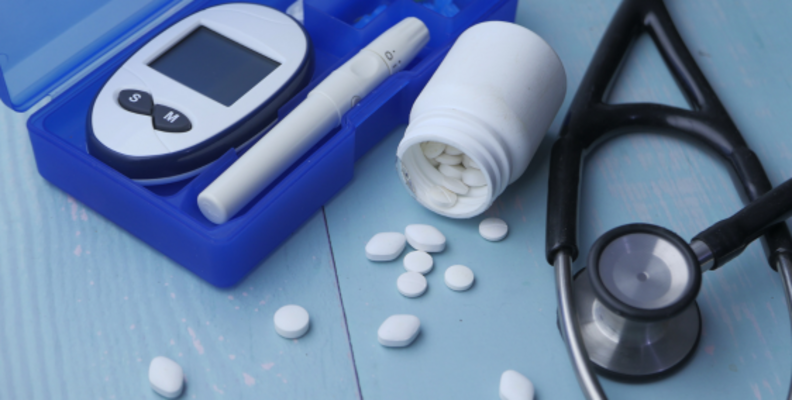

Description:
Welcome to the Diabetes Prediction Dataset, a valuable resource for researchers, data scientists, and medical professionals interested in the field of diabetes risk assessment and prediction. This dataset contains a diverse range of health-related attributes, meticulously collected to aid in the development of predictive models for identifying individuals at risk of diabetes. By sharing this dataset, we aim to foster collaboration and innovation within the data science community, leading to improved early diagnosis and personalized treatment strategies for diabetes.

## Data preprocessing

### EDA

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_squared_error as MSR
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as DTC

In [2]:
# Read Dataset
Diabetets = pd.read_csv('Healthcare-Diabetes.csv')
Diabetets.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Information about Dataset
Diabetets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
# Show Column of Dataset
Diabetets.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Data Cleaning

In [5]:
# Show that disease is Pregnancy or Not
def Pregnancy(x):
    '''
    function to convert Pregnancies time in dataset , take x input
    Pregnancies greater than zero , put Pregnancies equal 1 
    Pregnancies equal or less than zero , put Pregnancies equal 0 
    '''
    if x > 0:
        return 1
    else:
        return 0

In [6]:
Diabetets['Pregnancies'] = Diabetets['Pregnancies'].apply(Pregnancy) 

In [7]:
# Drop Usefuless
Diabetets.drop('Id',axis=1,inplace=True)
Diabetets.rename({'Pregnancies':'Pregnancy'},axis=1,inplace=True)                    

In [8]:
# Show Null Values
Diabetets.isnull().sum()

Pregnancy                   0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
Diabetets.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancy,2768.0,0.851156,0.355999,0.000,1.000,1.000,1.000,1.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


### Data Visualizition

Text(0.5, 1.0, 'Relationship betewwn Glucose , BloodPressure and Diabetets')

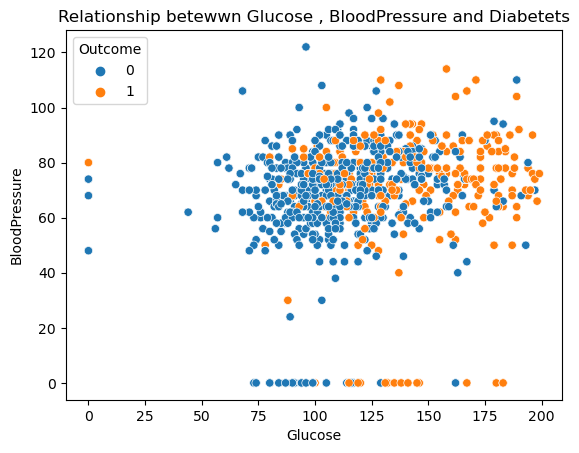

In [10]:
sns.scatterplot(Diabetets,x='Glucose',y='BloodPressure',hue='Outcome')
plt.title('Relationship betewwn Glucose , BloodPressure and Diabetets')

By increase rate of Glucose and BloodPressure ,the occur of diabets increase 

Text(0.5, 1.0, 'Relationship betewwn Insulin , BMI and Diabetets')

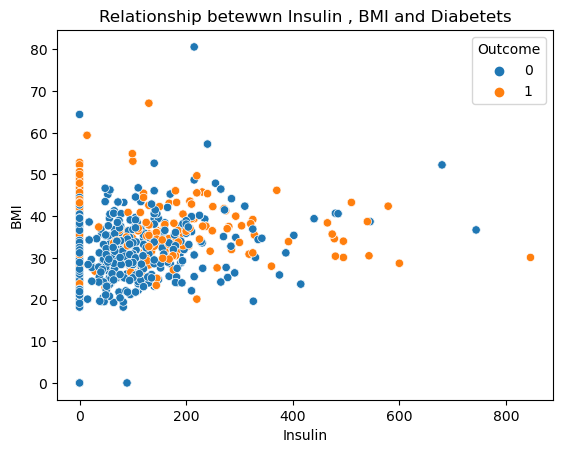

In [11]:
sns.scatterplot(Diabetets,x='Insulin',y='BMI',hue='Outcome')
plt.title('Relationship betewwn Insulin , BMI and Diabetets')

By increase rate of Insulin and BMI ,the occur of diabets increase 

Text(0.5, 1.0, 'Relationship betewwn DiabetesPedigreeFunction , Age and Diabetets')

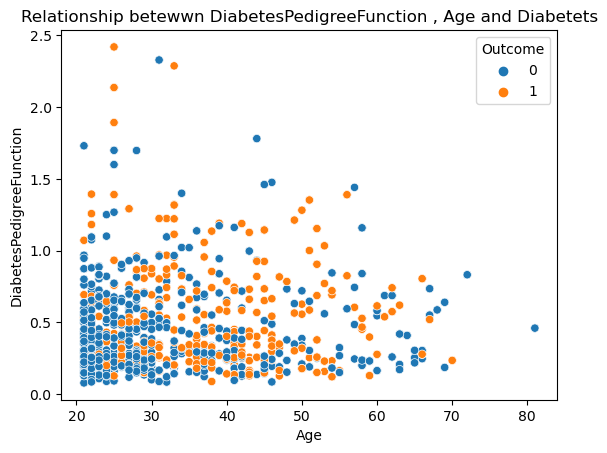

In [12]:
sns.scatterplot(Diabetets,x='Age',y='DiabetesPedigreeFunction',hue='Outcome')
plt.title('Relationship betewwn DiabetesPedigreeFunction , Age and Diabetets')

By increase of Age,the occur of diabets increase 

### Data Spliting

In [13]:
X = Diabetets.iloc[:,:-1]
Y = Diabetets.iloc[:,-1]

In [14]:
x_train,x_test,y_train,y_test = split(X,Y,test_size=0.2,random_state=44)

In [15]:
print('---Train Data Shape----',x_train.shape,y_train.shape,sep='\n')

---Train Data Shape----
(2214, 8)
(2214,)


In [16]:
print('---Test Data Shape----',x_test.shape,y_test.shape,sep='\n')

---Test Data Shape----
(554, 8)
(554,)


## Machine Learning Algorithm

### Decision Tree 

In [17]:
classifier = DTC()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
print('Accuracy of Train Data',classifier.score(x_train,y_train)*100,sep=' : ')

Accuracy of Train Data : 100.0


In [19]:
print('Accuracy of test Data',classifier.score(x_test,y_test)*100,sep=' : ')

Accuracy of test Data : 99.27797833935018


## Error

In [20]:
y_prediction = classifier.predict(x_test)

### Accuracy Scocre

In [21]:
accuracy =  accuracy_score(y_test,y_prediction)
print('Accuracy = ' ,accuracy*100)

Accuracy =  99.27797833935018


### Mean Squared Error

In [22]:
error =  MSR(y_test,y_prediction)
print('Mean Squared Error = ' ,error)

Mean Squared Error =  0.007220216606498195


### Confusion Matrix

Confusion Matrix =  [[362   3]
 [  1 188]]


<Axes: title={'center': 'Confusion Matrix heatmap'}>

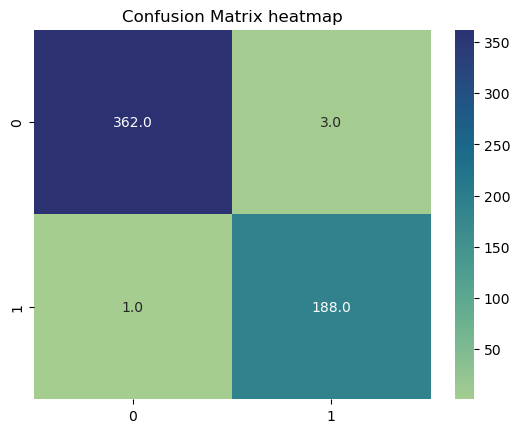

In [23]:
matrix = confusion_matrix(y_test,y_prediction)
print('Confusion Matrix = ',matrix)
plt.title('Confusion Matrix heatmap')
sns.heatmap(matrix,annot=True, fmt=".1f",cmap='crest')